# 목표 - 데이터 전처리
- 데이터 불러오기
## 데이터 탐색
    - boxplot
    - 정규성
    - t검정 평균이 차이나는지
    - F검정 분산이 차이나는지
    - VIF와 공분산성 확인 ∵다중공선성 문제
## 데이터 전처리
- minmaxscale
- standardscale
- robustscale
- log변환
## 데이터 재탐색
    - 공분산 hitmap
    - VIF 확인
    - 정규성 검증
    - t검정

# for 데이터 전처리

In [1]:
import os
current_directory = os.getcwd() # 현재 작업 디렉토리를 얻기
print("현재 작업 디렉토리:", current_directory)

현재 작업 디렉토리: c:\Users\jay_hook\myhub\miniproj


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지 제거
import warnings
warnings.filterwarnings('ignore')

- 데이터 불러오기

In [11]:
df = pd.read_csv(current_directory+'/monthly_data.csv', index_col=0)

## EDA 데이터 탐색 

In [13]:
df

,시점,경제심리지수(원계열),뉴스심리지수,소비자심리지수,원자재구입가격실적,수출실적,원자재구입가격전망,수출전망,"M2(말잔, 원계열)",미국M2,USBIS,KOBIS,KOTN,USTN,KORIBOR,USRIBOR,달러결제수출금액,달러결제수입금액,달러결제수출비율,달러결제수입비율
0,200807,93.6,79.55,74.6,159,121,154,116,1375993.6,7745.0,2.000,5.00,6.030,3.946,5.66,2.79125,35024.4,35797.2,85.5,83.3
1,200808,101.8,75.88,92.4,130,111,123,110,1394030.4,7742.7,2.000,5.25,5.910,3.812,5.79,2.81063,31685.4,33315.4,86.5,82.4
2,200809,97.8,70.51,91.2,128,103,123,106,1392431.9,7815.6,2.000,5.25,5.990,3.823,5.82,4.05250,32363.8,32790.9,86.5,83.0
3,200810,82.5,60.04,78.9,124,102,121,99,1411370.4,7922.1,1.000,4.25,5.530,3.964,5.87,3.02625,31572.6,29797.5,85.1,82.5
4,200811,71.2,65.53,74.1,109,83,107,74,1427905.3,8012.5,1.000,4.00,5.730,2.920,5.43,2.21688,24279.5,23863.6,84.2,82.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,202208,99.3,97.92,89.0,132,105,133,104,3737384.8,21552.7,2.375,2.50,3.322,3.193,2.87,3.09971,48689.5,55181.8,86.0,83.6
170,202209,98.0,86.14,91.6,127,98,128,93,3747840.6,21475.3,3.125,2.50,3.897,3.829,3.18,3.75471,48955.1,51457.7,85.6,84.3
171,202210,95.4,80.15,89.0,120,87,120,90,3769959.8,21388.4,3.125,3.00,4.267,4.048,3.89,4.46029,44748.6,49349.4,85.4,83.4
172,202211,91.2,88.53,86.7,121,93,121,89,3798048.0,21400.7,3.875,3.25,3.915,3.605,4.08,4.77857,43660.8,48129.0,84.3,81.8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 173
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시점           174 non-null    int64  
 1   경제심리지수(원계열)  174 non-null    float64
 2   뉴스심리지수       174 non-null    float64
 3   소비자심리지수      174 non-null    float64
 4   원자재구입가격실적    174 non-null    int64  
 5   수출실적         174 non-null    int64  
 6   원자재구입가격전망    174 non-null    int64  
 7   수출전망         174 non-null    int64  
 8   M2(말잔, 원계열)  174 non-null    float64
 9   미국M2         174 non-null    float64
 10  USBIS        174 non-null    float64
 11  KOBIS        174 non-null    float64
 12  KOTN         174 non-null    float64
 13  USTN         174 non-null    float64
 14  KORIBOR      174 non-null    float64
 15  USRIBOR      174 non-null    float64
 16  달러결제수출금액     174 non-null    float64
 17  달러결제수입금액     174 non-null    float64
 18  달러결제수출비율     174 non-null    float64
 19  달러결제수입비율     

In [15]:
df.describe()

,시점,경제심리지수(원계열),뉴스심리지수,소비자심리지수,원자재구입가격실적,수출실적,원자재구입가격전망,수출전망,"M2(말잔, 원계열)",미국M2,USBIS,KOBIS,KOTN,USTN,KORIBOR,USRIBOR,달러결제수출금액,달러결제수입금액,달러결제수출비율,달러결제수입비율
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,174.00000,174.00000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,201530.741379,97.956897,99.775287,101.382759,113.114943,94.522989,112.683908,96.149425,2.339397e+06,13074.197701,0.64296,1.95546,3.059333,2.336885,2.217586,0.964631,38331.045977,33781.013793,84.909195,81.247126
std,420.119879,10.130560,10.435549,9.473916,13.168473,15.545832,12.329207,15.315585,6.788562e+05,4109.038257,0.86422,0.91934,1.238974,0.788058,1.043861,1.011979,6097.071391,7047.488641,1.100723,2.299778
min,200807.000000,61.200000,60.040000,69.200000,90.000000,51.000000,91.000000,49.000000,1.375994e+06,7742.700000,0.12500,0.50000,1.254000,0.528000,0.580000,0.117750,17886.200000,17905.900000,82.300000,76.300000
25%,201202.250000,94.525000,94.717500,98.125000,103.250000,85.000000,104.000000,87.250000,1.759657e+06,9810.975000,0.12500,1.25000,2.091750,1.776250,1.510000,0.262825,35327.575000,29531.400000,84.200000,79.300000
50%,201509.500000,97.800000,101.020000,102.200000,109.500000,92.000000,109.000000,94.000000,2.230001e+06,12154.850000,0.12500,1.75000,2.763000,2.336500,1.980000,0.457175,39065.050000,34301.500000,85.050000,81.500000
75%,201904.750000,103.600000,106.130000,107.100000,120.000000,103.750000,119.750000,105.000000,2.770705e+06,14611.000000,1.00000,2.50000,3.847500,2.860000,2.785000,1.369630,41657.050000,36757.875000,85.700000,82.900000
max,202212.000000,116.500000,119.420000,122.100000,159.000000,132.000000,154.000000,131.000000,3.798048e+06,21855.700000,4.37500,5.25000,6.030000,4.048000,5.870000,4.778570,54293.600000,55347.900000,87.000000,87.000000


- boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1c64cb35a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c64cb4af90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c64aa38610>],
 'medians': [<matplotlib.lines.Line2D at 0x1c64cb58110>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c64cb589d0>],
 'means': []}

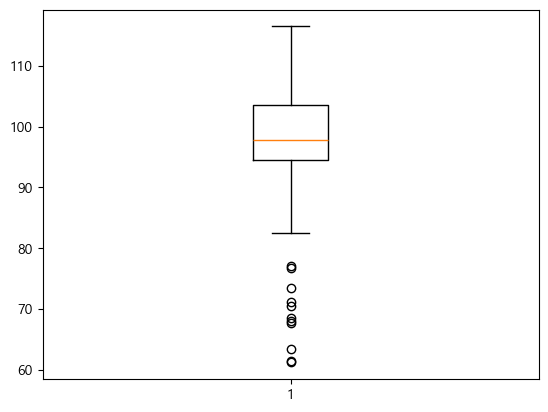

In [20]:
plt.boxplot(df[df.columns[1]])

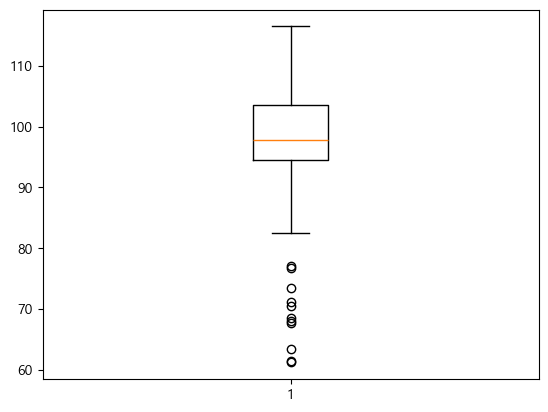

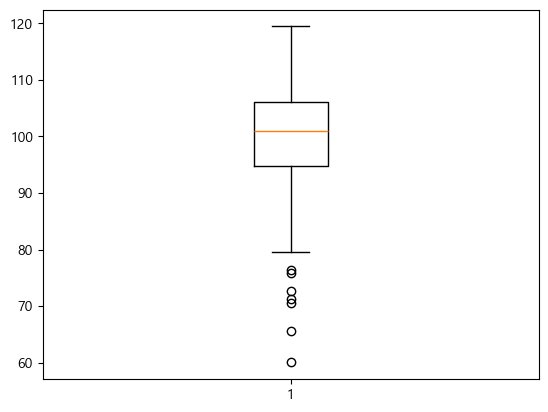

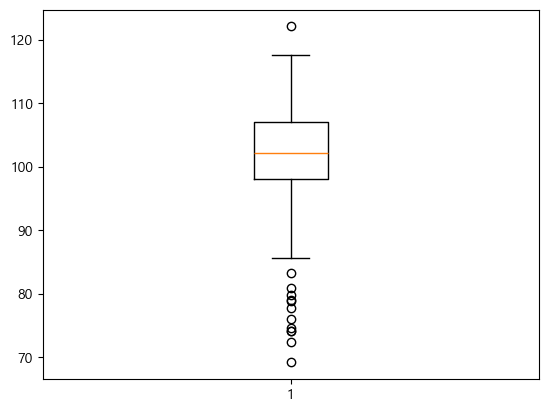

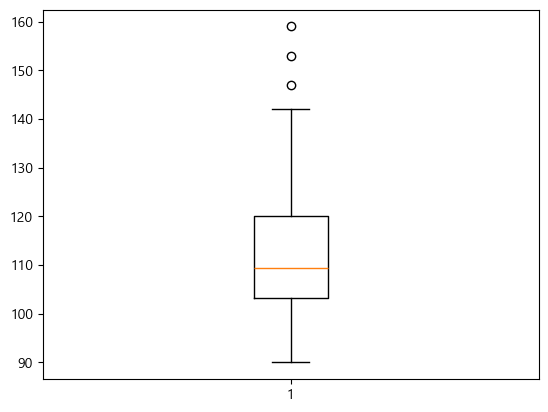

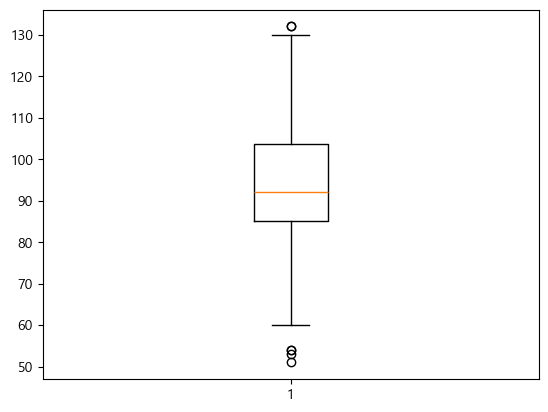

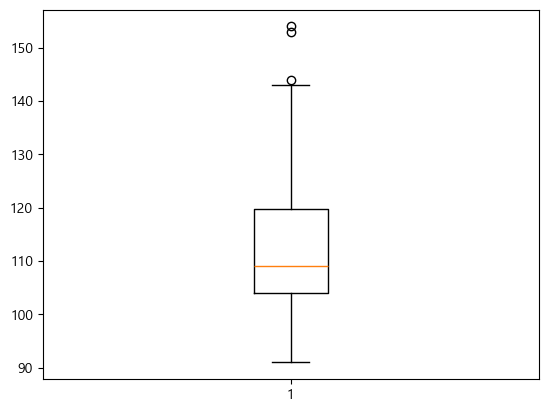

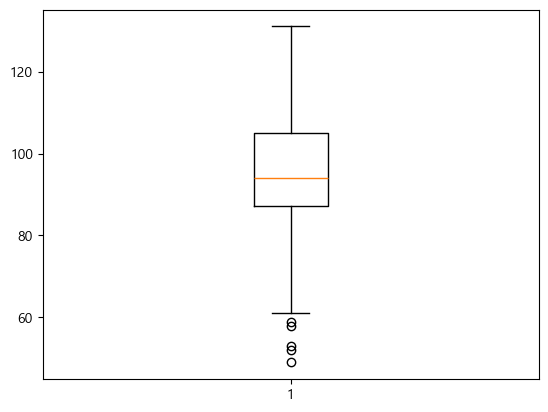

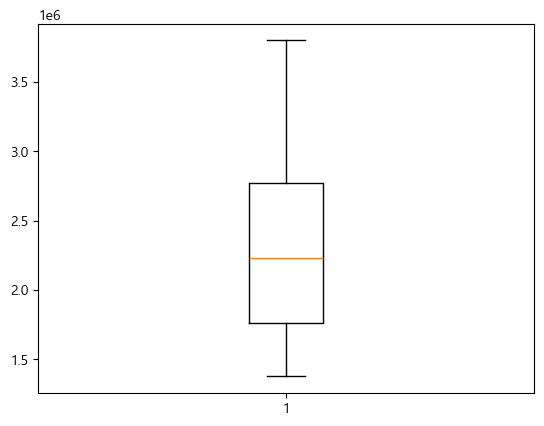

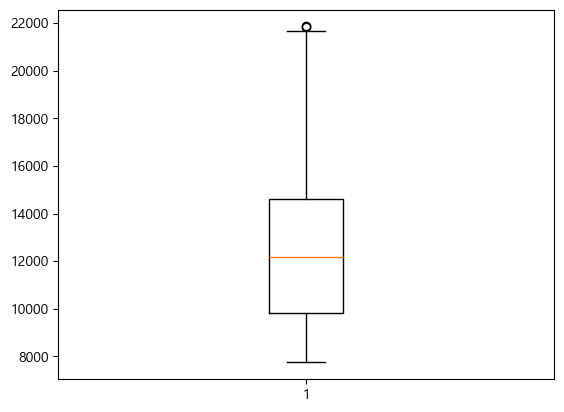

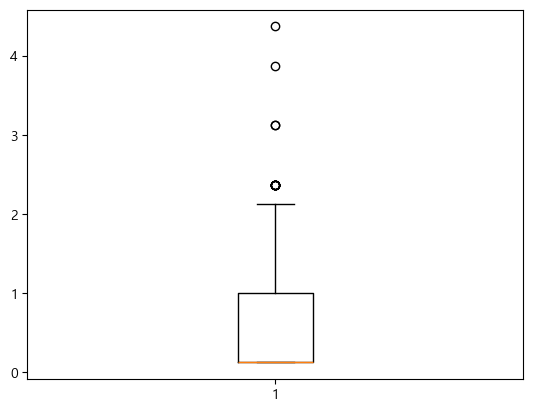

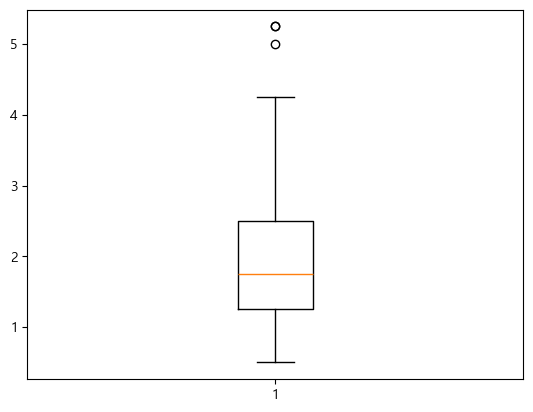

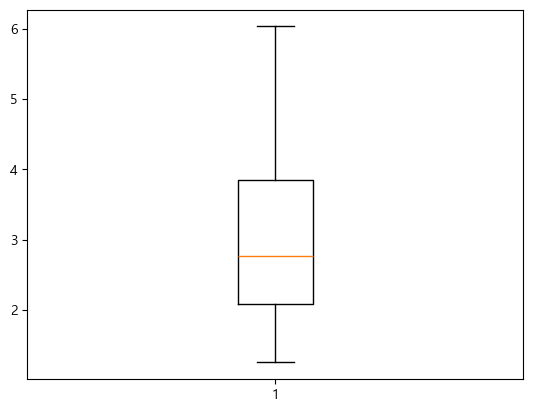

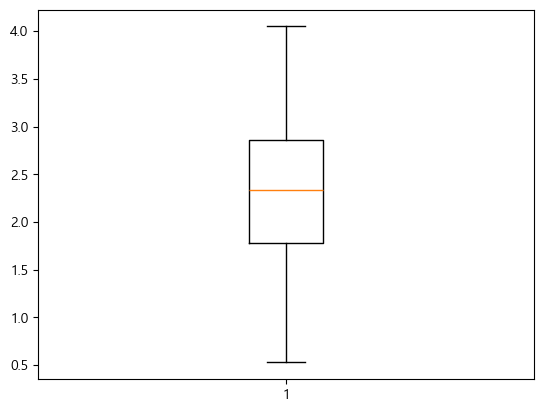

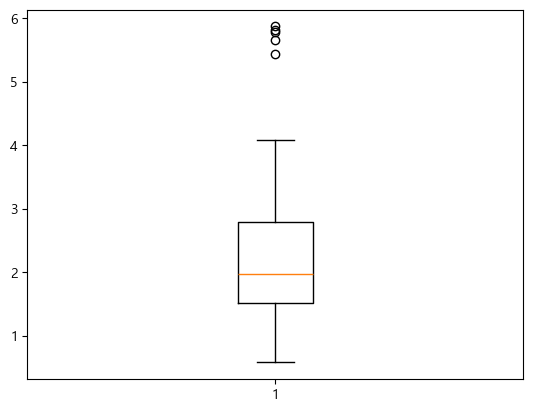

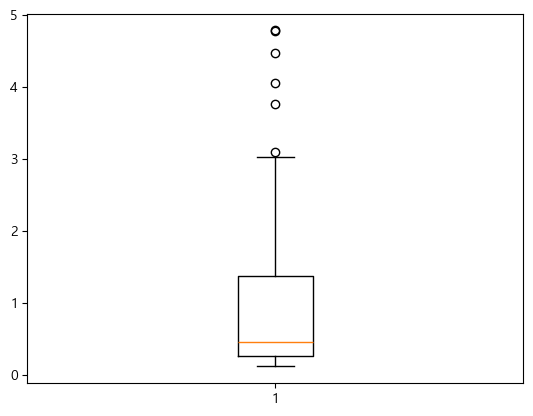

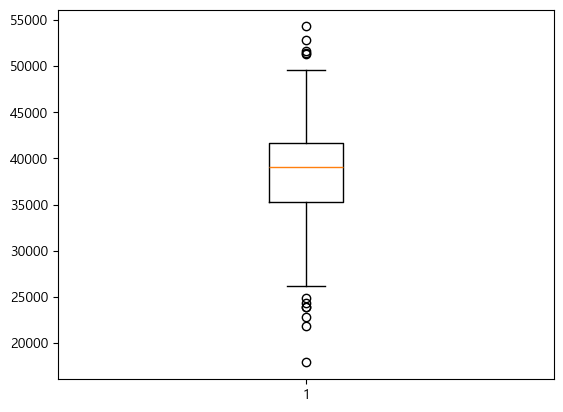

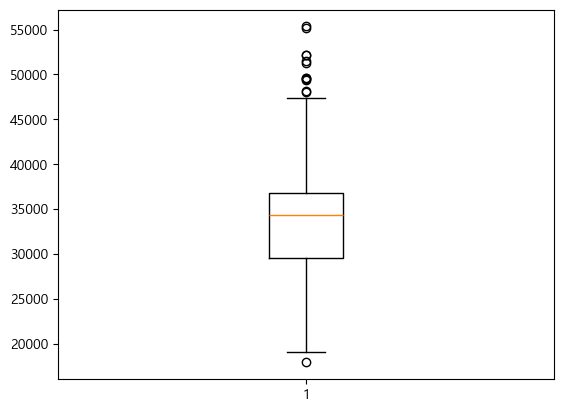

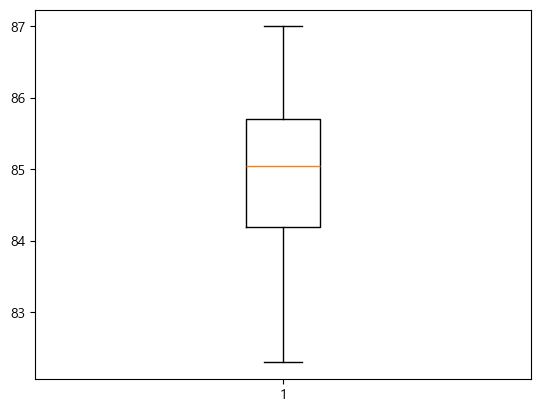

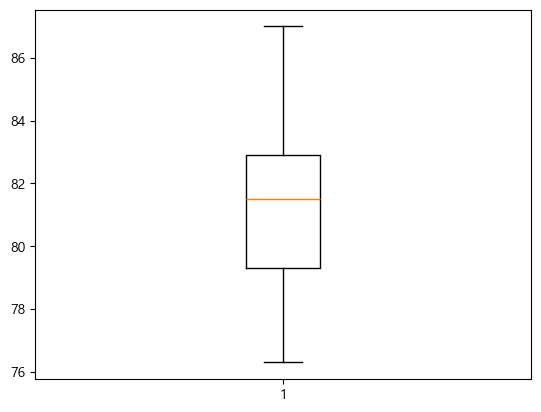

In [21]:
for i in df.columns[1:]:
    plt.boxplot(df[i])
    plt.show()